# **Predicting interest rates from Federal Reserve documents**
## Baseline Definition (Vol. 5)
FE 690: Machine Learning in Finance \\
Author: Theo Dimitrasopoulos \\
Advisor: Zachary Feinstein \\

## **Setup**

### Environment

In [1]:
# -*- coding: utf-8 -*-

# ENVIRONMENT CHECK:
import sys, os, inspect, site, pprint
# Check whether in Colab:
IN_COLAB = 'google.colab' in sys.modules
if IN_COLAB == True:
  print('YES, this is a Google Colaboratory environment.')
else:
  print('NO, this is not a Google Colaboratory environment.')
print(' ')

# Python installation files:
stdlib = os.path.dirname(inspect.getfile(os))
python_version = !python --version
print('Python Standard Library is located in:\n' + stdlib)
print(' ')
print('This environment is using {}'.format(str(python_version[0])))
print(' ')
print('Local system packages are located in:')
pprint.pprint(site.getsitepackages())
print(' ')
print('Local user packages are located in:\n' + site.getusersitepackages())


YES, this is a Google Colaboratory environment.
 
Python Standard Library is located in:
/usr/lib/python3.6
 
This environment is using Python 3.6.9
 
Local system packages are located in:
['/usr/local/lib/python3.6/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/lib/python3.6/dist-packages']
 
Local user packages are located in:
/root/.local/lib/python3.6/site-packages


### Default Packages

In [2]:
# Installed packages:
!pip list -v
!pip list --user -v


Package                       Version         Location                               Installer
----------------------------- --------------- -------------------------------------- ---------
absl-py                       0.10.0          /usr/local/lib/python3.6/dist-packages pip      
alabaster                     0.7.12          /usr/local/lib/python3.6/dist-packages pip      
albumentations                0.1.12          /usr/local/lib/python3.6/dist-packages pip      
altair                        4.1.0           /usr/local/lib/python3.6/dist-packages pip      
argon2-cffi                   20.1.0          /usr/local/lib/python3.6/dist-packages pip      
asgiref                       3.3.1           /usr/local/lib/python3.6/dist-packages pip      
astor                         0.8.1           /usr/local/lib/python3.6/dist-packages pip      
astropy                       4.1             /usr/local/lib/python3.6/dist-packages pip      
astunparse                    1.6.3           /usr

### Mount Google Drive

In [ ]:
# Mount Google Drive:
if IN_COLAB:
  from google.colab import drive
  drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


### System Environment Variables

In [ ]:
if IN_COLAB:
  employment_data_dir = '/content/drive/My Drive/Colab Notebooks/proj2/src/data/MarketData/Employment/'
  cpi_data_dir = '/content/drive/My Drive/Colab Notebooks/proj2/src/data/MarketData/CPI/'
  fed_rates_dir = '/content/drive/My Drive/Colab Notebooks/proj2/src/data/MarketData/FEDRates/'
  fx_rates_dir = '/content/drive/My Drive/Colab Notebooks/proj2/src/data/MarketData/FXRates/'
  gdp_data_dir = '/content/drive/My Drive/Colab Notebooks/proj2/src/data/MarketData/GDP/'
  ism_data_dir = '/content/drive/My Drive/Colab Notebooks/proj2/src/data/MarketData/ISM/'
  sales_data_dir = '/content/drive/My Drive/Colab Notebooks/proj2/src/data/MarketData/Sales/'
  treasury_data_dir = '/content/drive/My Drive/Colab Notebooks/proj2/src/data/MarketData/Treasury/'
  fomc_dir = '/content/drive/My Drive/Colab Notebooks/proj2/src/data/FOMC/'
  preprocessed_dir = '/content/drive/My Drive/Colab Notebooks/proj2/src/data/preprocessed/'
  train_dir = '/content/drive/My Drive/Colab Notebooks/proj2/src/data/train_data/'
  output_dir = '/content/drive/My Drive/Colab Notebooks/proj2/src/data/result/'
  keyword_lm_dir = '/content/drive/My Drive/Colab Notebooks/proj2/src/data/LoughranMcDonald/'
  glove_dir = '/content/drive/My Drive/Colab Notebooks/proj2/src/data/GloVe/'
  model_dir = '/content/drive/My Drive/Colab Notebooks/proj2/src/data/models/'
  graph_dir = '/content/drive/My Drive/Colab Notebooks/proj2/src/data/graphs/'
else:
  employment_data_dir = 'C:/Users/theon/GDrive/Colab Notebooks/proj2/src/data/MarketData/Employment/'
  cpi_data_dir = 'C:/Users/theon/GDrive/Colab Notebooks/proj2/src/data/MarketData/CPI/'
  fed_rates_dir = 'C:/Users/theon/GDrive/Colab Notebooks/proj2/src/data/MarketData/FEDRates/'
  fx_rates_dir = 'C:/Users/theon/GDrive/Colab Notebooks/proj2/src/data/MarketData/FXRates/'
  gdp_data_dir = 'C:/Users/theon/GDrive/Colab Notebooks/proj2/src/data/MarketData/GDP/'
  ism_data_dir = 'C:/Users/theon/GDrive/Colab Notebooks/proj2/src/data/MarketData/ISM/'
  sales_data_dir = 'C:/Users/theon/GDrive/Colab Notebooks/proj2/src/data/MarketData/Sales/'
  treasury_data_dir = 'C:/Users/theon/GDrive/Colab Notebooks/proj2/src/data/MarketData/Treasury/'
  fomc_dir = 'C:/Users/theon/GDrive/Colab Notebooks/proj2/src/data/FOMC/'
  preprocessed_dir = 'C:/Users/theon/GDrive/Colab Notebooks/proj2/src/data/preprocessed/'
  train_dir = 'C:/Users/theon/GDrive/Colab Notebooks/proj2/src/data/train_data/'
  output_dir = 'C:/Users/theon/GDrive/Colab Notebooks/proj2/src/data/result/'
  keyword_lm_dir = 'C:/Users/theon/GDrive/Colab Notebooks/proj2/src/data/LoughranMcDonald/'
  glove_dir = 'C:/Users/theon/GDrive/Colab Notebooks/proj2/src/data/GloVe/'
  model_dir = 'C:/Users/theon/GDrive/Colab Notebooks/proj2/src/data/models/'
  graph_dir = 'C:/Users/theon/GDrive/Colab Notebooks/proj2/src/data/graphs/'


### Packages

#### Uninstall/Install Packages:

In [ ]:
#if IN_COLAB:
#  # Uninstall existing versions:
#  !pip uninstall bs4 -y
#  !pip uninstall textract -y
#  !pip uninstall numpy -y
#  !pip uninstall pandas -y
#  !pip uninstall requests -y
#  !pip uninstall tqdm -y
#  !pip uninstall nltk -y
#  !pip uninstall quandl -y
#  !pip uninstall scikit-plot -y
#  !pip uninstall seaborn -y
#  !pip uninstall sklearn -y
#  !pip uninstall torch -y
#  !pip uninstall transformers -y
#  !pip uninstall wordcloud -y
#  !pip uninstall xgboost -y
#  
#  # Install packages:
#  !pip install bs4==0.0.1
#  !pip install textract==1.6.3
#  !pip install numpy==1.19.4
#  !pip install pandas==1.1.4
#  !pip install requests==2.24.0
#  !pip install tqdm==4.51.0
#  !pip install nltk==3.5
#  !pip install quandl==3.5.3
#  !pip install scikit-plot==0.3.7
#  !pip install seaborn==0.11.0
#  !pip install sklearn==0.0
#  !pip install torch==1.7.1+cu101 torchvision==0.8.2+cu101 -f https://download.pytorch.org/whl/torch_stable.html
#  !pip install transformers==3.5.0
#  !pip install wordcloud==1.8.0
#  !pip install xgboost==1.2.1
#  os.kill(os.getpid(), 9)


#### Inspect Packages

In [3]:
!pip list -v
!pip list --user -v


Package                       Version         Location                               Installer
----------------------------- --------------- -------------------------------------- ---------
absl-py                       0.10.0          /usr/local/lib/python3.6/dist-packages pip      
alabaster                     0.7.12          /usr/local/lib/python3.6/dist-packages pip      
albumentations                0.1.12          /usr/local/lib/python3.6/dist-packages pip      
altair                        4.1.0           /usr/local/lib/python3.6/dist-packages pip      
argon2-cffi                   20.1.0          /usr/local/lib/python3.6/dist-packages pip      
asgiref                       3.3.1           /usr/local/lib/python3.6/dist-packages pip      
astor                         0.8.1           /usr/local/lib/python3.6/dist-packages pip      
astropy                       4.1             /usr/local/lib/python3.6/dist-packages pip      
astunparse                    1.6.3           /usr

#### Import Packages:

In [ ]:
# Python libraries
import pprint
import datetime as dt
import re
import pickle
from tqdm.notebook import tqdm
import time
import logging
import random
from collections import defaultdict, Counter
import xgboost as xgb

# Data Science modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
plt.style.use('ggplot')

# Import Scikit-learn models
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, f1_score, plot_confusion_matrix
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_validate, StratifiedKFold, learning_curve, RandomizedSearchCV
import scikitplot as skplt

# Import nltk modules and download dataset
import nltk
from nltk.corpus import stopwords
from nltk.util import ngrams
from nltk.tokenize import word_tokenize, sent_tokenize

# Import Pytorch modules
import torch
from torch import nn, optim
import torch.nn.functional as F
from torch.utils.data import (DataLoader, RandomSampler, SequentialSampler, TensorDataset)
from torch.autograd import Variable
from torch.optim import Adam, AdamW

#### Settings

In [ ]:
# General:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
get_ipython().run_line_magic('matplotlib', 'inline')


In [ ]:
# Set display preference (Optional)
plt.rcParams["figure.figsize"] = (18,9)
plt.style.use('fivethirtyeight')
sns.set(style='white', context='notebook', palette='deep')

pd.options.display.max_rows = 20
pd.options.display.max_seq_items = 50
pd.set_option('display.max_colwidth', 200)

In [ ]:
# Fiinalize nltk setup:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

stop = set(stopwords.words('english'))

# Test pprint
pprint.pprint(sys.path)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


['',
 '/env/python',
 '/usr/lib/python36.zip',
 '/usr/lib/python3.6',
 '/usr/lib/python3.6/lib-dynload',
 '/usr/local/lib/python3.6/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.6/dist-packages/IPython/extensions',
 '/root/.ipython']


In [ ]:
## Use TPU
#if IN_COLAB:
#  assert os.environ['COLAB_TPU_ADDR'], 'Select TPU: Runtime > Change runtime type > Hardware accelerator'
#  VERSION = "20200220"
#  !curl https://raw.githubusercontent.com/pytorch/xla/master/contrib/scripts/env-setup.py -o pytorch-xla-env-setup.py
#  !python pytorch-xla-env-setup.py --version $VERSION

In [ ]:
## Use GPU Runtime:
if IN_COLAB:
  if torch.cuda.is_available():
    torch.cuda.get_device_name(0)
    gpu_info = !nvidia-smi
    gpu_info = '\n'.join(gpu_info)
    print(gpu_info)
  else:
    print('Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, and then re-execute this cell.')
    os.kill(os.getpid(), 9)  


Mon Jan 25 12:27:54 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0    26W / 250W |     10MiB / 16280MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# Set logger
logger = logging.getLogger('mylogger')
logger.setLevel(logging.DEBUG)
timestamp = time.strftime("%Y.%m.%d_%H.%M.%S", time.localtime())
fh = logging.FileHandler('log_model.txt')
fh.setLevel(logging.DEBUG)
ch = logging.StreamHandler()
ch.setLevel(logging.DEBUG)
formatter = logging.Formatter('[%(asctime)s][%(levelname)s] ## %(message)s')
fh.setFormatter(formatter)
ch.setFormatter(formatter)
logger.addHandler(fh)
logger.addHandler(ch)

In [ ]:
# Set Random Seed
random.seed(42)
np.random.seed(42)
torch.manual_seed(42)
torch.cuda.manual_seed(42)
rand_seed = 42

In [ ]:
# Set Seaborn Style
sns.set(style='white', context='notebook', palette='deep')

## **Function Definitions**

### Save df to .pickle + .csv

In [ ]:
if IN_COLAB:
  def save_data(df, file_name, dir_name=output_dir, index_csv=True):
    if not os.path.exists(dir_name):
      os.mkdir(dir_name)
    # Save results to a picke file
    file = open(dir_name + file_name + '.pickle', 'wb')
    pickle.dump(df, file)
    file.close()
    print('Successfully saved {}.pickle. in {}'.format(file_name, dir_name + file_name + '.pickle'))
    # Save results to a csv file
    df.to_csv(dir_name + file_name + '.csv', index=index_csv)
    print('Successfully saved {}.csv. in {}'.format(file_name, dir_name + file_name + '.csv'))

else:
  def save_data(df, file_name, dir_name=output_dir, index_csv=True):
    # Save results to a .picke file
    file = open(dir_name + file_name + '.pickle', 'wb')
    pickle.dump(df, file)
    file.close()
    print('Successfully saved {}.pickle. in {}'.format(file_name, dir_name + file_name + '.pickle'))
    # Save results to a .csv file
    df.to_csv(dir_name + file_name + '.csv', index=index_csv)
    print('Successfully saved {}.csv. in {}'.format(file_name, dir_name + file_name + '.csv'))


## **Load preprocessed data**

In [ ]:
# Load data
file = open(train_dir + 'nontext_train_small.pickle', 'rb')
train_df = pickle.load(file)
file.close()
#train_df = pd.read_csv(train_dir + 'nontext_train_small.csv')
train_df

,target,prev_decision,GDP_diff_prev,PMI_value,Employ_diff_prev,Rsales_diff_year,Unemp_diff_prev,Inertia_diff,Hsales_diff_year,Balanced_diff
date,,,,,,,,,,
1982-10-05,-1,0,0.456197,38.8,-169.0,1.807631,-0.166667,-0.018226,-15.485275,0.003723
1982-11-16,-1,-1,-0.382295,39.4,-228.0,1.807631,-0.200000,-0.018226,-9.537496,0.003723
1982-12-21,0,-1,-0.382295,39.2,-198.5,1.807631,-0.333333,-0.018226,-3.116275,0.003723
1983-01-14,0,0,-0.382295,42.8,-68.0,1.807631,-0.233333,-0.018226,-0.774432,0.003723
1983-01-21,0,0,-0.382295,42.8,-68.0,1.807631,-0.233333,-0.043785,-0.774432,0.003723
...,...,...,...,...,...,...,...,...,...,...
2020-03-15,-1,-1,0.527469,50.1,232.5,2.217385,0.000000,-0.058085,13.910886,0.004279
2020-03-19,0,-1,0.527469,50.1,232.5,2.217385,0.000000,-0.057139,13.910886,0.001426
2020-03-23,0,0,0.527469,50.1,232.5,2.217385,0.000000,-0.057139,13.910886,0.001426


### Balancing the classes

In [ ]:
# Percentage before the balancing
n_hold = sum(1 for each in train_df['target'] if each == 0)
n_lower = sum(1 for each in train_df['target'] if each == -1)
n_raise = sum(1 for each in train_df['target'] if each == 1)
N_examples = len(train_df)

print('Hold: ', round(n_hold/N_examples, 2))
print('Lower:', round(n_lower/N_examples, 2))
print('Raise:', round(n_raise/N_examples, 2))

Hold:  0.66
Lower: 0.18
Raise: 0.16


Here, take random sampling approach to balance the data. Though it loses some data, easy to process and less prone to the bias.<BER />

_Update: Decided not to do this as we do not have a lot of data. Consider different approach to tackle this imbalanced data issue. Thus, set keep_prob = 1 (keep everything). _

In [ ]:
# Too many Hold. Better to randomly pick to even the distribution
n_hold = sum(1 for each in train_df['target'] if each == 0)
N_examples = len(train_df)

# Keep probability (specify decimal value between 0 and 1)
# keep_prob = (N_examples - n_hold)/2/n_hold
keep_prob = 1

balanced = pd.concat([train_df.loc[train_df['target'] != 0], train_df.loc[train_df['target'] == 0].sample(frac=keep_prob, random_state=1)])
balanced.sort_index(ascending=True, inplace=True)

n_hold = sum(1 for each in balanced['target'] if each == 0)
n_lower = sum(1 for each in balanced['target'] if each == -1)
n_raise = sum(1 for each in balanced['target'] if each == 1)
N_examples = len(balanced['target'])
print('Hold: ', round(n_hold/N_examples, 2))
print('Lower:', round(n_lower/N_examples, 2))
print('Raise:', round(n_raise/N_examples, 2))

Hold:  0.66
Lower: 0.18
Raise: 0.16


In [ ]:
def convert_class(x):
    if x == 1:
        return 3
    elif x == 0:
        return 2
    elif x == -1:
        return 1

In [ ]:
Y_balanced = balanced['target'].map(convert_class)
X_balanced = balanced.drop(columns=['target'])
Y_balanced
X_balanced

,prev_decision,GDP_diff_prev,PMI_value,Employ_diff_prev,Rsales_diff_year,Unemp_diff_prev,Inertia_diff,Hsales_diff_year,Balanced_diff
date,,,,,,,,,
1982-10-05,0,0.456197,38.8,-169.0,1.807631,-0.166667,-0.018226,-15.485275,0.003723
1982-11-16,-1,-0.382295,39.4,-228.0,1.807631,-0.200000,-0.018226,-9.537496,0.003723
1982-12-21,-1,-0.382295,39.2,-198.5,1.807631,-0.333333,-0.018226,-3.116275,0.003723
1983-01-14,0,-0.382295,42.8,-68.0,1.807631,-0.233333,-0.018226,-0.774432,0.003723
1983-01-21,0,-0.382295,42.8,-68.0,1.807631,-0.233333,-0.043785,-0.774432,0.003723
...,...,...,...,...,...,...,...,...,...
2020-03-15,-1,0.527469,50.1,232.5,2.217385,0.000000,-0.058085,13.910886,0.004279
2020-03-19,-1,0.527469,50.1,232.5,2.217385,0.000000,-0.057139,13.910886,0.001426
2020-03-23,0,0.527469,50.1,232.5,2.217385,0.000000,-0.057139,13.910886,0.001426


In [ ]:
# Because the prediction should be on the latest and should not look back, use shuffle=False
X_train, X_test, Y_train, Y_test = \
model_selection.train_test_split(X_balanced.values, Y_balanced.values, test_size=0.2, shuffle=False)

In [ ]:
print("Training Data: Total {}, {}".format(len(Y_train), Counter(Y_train)))
print("Test Data: Total {}, {}".format(len(Y_test), Counter(Y_test)))

Training Data: Total 318, Counter({2: 203, 1: 63, 3: 52})
Test Data: Total 80, Counter({2: 58, 3: 13, 1: 9})


In [ ]:
Y_balanced.head()

date
1982-10-05    1
1982-11-16    1
1982-12-21    2
1983-01-14    2
1983-01-21    2
Name: target, dtype: int64

## **Modeling and Training**

### Sanity checks

In [ ]:
# Use Stratified KFold Cross Validation
n_fold = 7
kfold = StratifiedKFold(n_splits=n_fold)
kfold

StratifiedKFold(n_splits=7, random_state=None, shuffle=False)

In [ ]:
# Roughly check base classifiers without hyperparameter setting

random_state = 2
classifiers = []
classifiers.append(("SVC", SVC(random_state=random_state)))
classifiers.append(("DecisionTree", DecisionTreeClassifier(random_state=random_state)))
classifiers.append(("AdaBoost", AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1)))
classifiers.append(("RandomForest", RandomForestClassifier(random_state=random_state, n_estimators=100)))
classifiers.append(("ExtraTrees", ExtraTreesClassifier(random_state=random_state)))
classifiers.append(("GradientBoosting", GradientBoostingClassifier(random_state=random_state)))
classifiers.append(("MultipleLayerPerceptron", MLPClassifier(random_state=random_state)))
classifiers.append(("KNeighboors", KNeighborsClassifier(n_neighbors=3)))
classifiers.append(("LogisticRegression", LogisticRegression(random_state = random_state)))
classifiers.append(("LinearDiscriminantAnalysis", LinearDiscriminantAnalysis()))
classifiers.append(("GaussianNB", GaussianNB()))
classifiers.append(("Perceptron", Perceptron()))
classifiers.append(("LinearSVC", LinearSVC()))
classifiers.append(("SGD", SGDClassifier()))

cv_results = []
classifier_name = []
for classifier in classifiers :
    cv_results.append(cross_validate(classifier[1], X_train, y = Y_train, scoring = ["accuracy", "f1_macro"], cv = kfold, n_jobs=4))
    classifier_name.append(classifier[0])

cv_acc_means = []
cv_acc_std = []
cv_f1_means = []
cv_f1_std = []
for cv_result in cv_results:
    cv_acc_means.append(cv_result['test_accuracy'].mean())
    cv_acc_std.append(cv_result['test_accuracy'].std())
    cv_f1_means.append(cv_result['test_f1_macro'].mean())
    cv_f1_std.append(cv_result['test_f1_macro'].std())

cv_res = pd.DataFrame({"Algorithm": classifier_name,
                       "CVAccMeans":cv_acc_means,
                       "CVAccErrors": cv_acc_std,
                       "CVf1Means":cv_f1_means,
                       "CVf1Errors": cv_f1_std})

In [ ]:
cv_res.sort_values(by='CVAccMeans', ascending=False)

,Algorithm,CVAccMeans,CVAccErrors,CVf1Means,CVf1Errors
0,SVC,0.638440,0.006933,0.259768,0.001724
3,RandomForest,0.613872,0.084025,0.499901,0.133119
4,ExtraTrees,0.604555,0.089632,0.484787,0.129810
9,LinearDiscriminantAnalysis,0.600621,0.079205,0.441110,0.109036
12,LinearSVC,0.591235,0.073014,0.328765,0.076731
5,GradientBoosting,0.572740,0.067923,0.473122,0.093812
6,MultipleLayerPerceptron,0.569220,0.074575,0.366500,0.137015
8,LogisticRegression,0.565977,0.064877,0.330084,0.056546
11,Perceptron,0.530918,0.134277,0.308106,0.083499
10,GaussianNB,0.526294,0.194258,0.491646,0.193769


Text(0.5, 1.0, 'Cross validation scores')

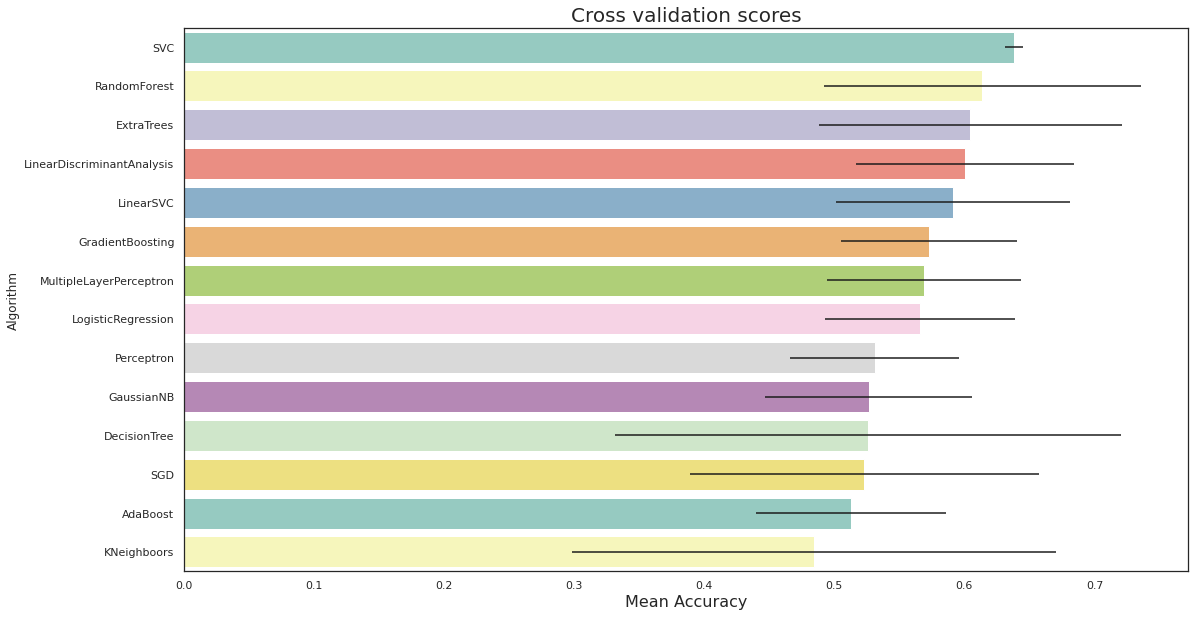

In [ ]:
plt.figure(figsize=(18,10))
ax = sns.barplot("CVAccMeans","Algorithm",data=cv_res.sort_values(by='CVAccMeans', ascending=False), palette="Set3", orient="h", **{'xerr':cv_acc_std})
ax.set_xlabel("Mean Accuracy", size=16)
ax.set_title("Cross validation scores", size=20)

Text(0.5, 1.0, 'Cross validation scores')

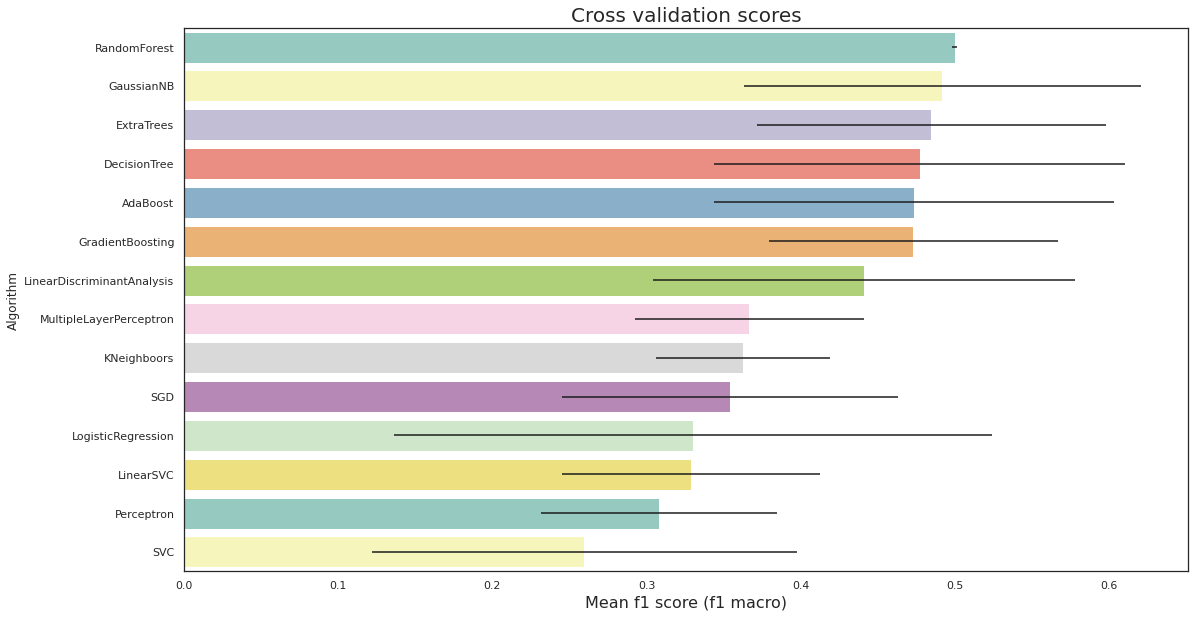

In [ ]:
plt.figure(figsize=(18,10))
ax = sns.barplot("CVf1Means","Algorithm",data=cv_res.sort_values(by='CVf1Means', ascending=False), palette="Set3", orient="h", **{'xerr':cv_f1_std})
ax.set_xlabel("Mean f1 score (f1 macro)", size=16)
ax.set_title("Cross validation scores", size=20)

### Hyperparameter Tuning

In [ ]:
def metric(y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average='macro')
    return acc, f1

scoring = {'Accuracy': 'accuracy', 'F1': 'f1_macro'}
refit = 'F1'

In [ ]:
def train_grid_search(estimator, param_grid, scoring, refit, cv=5, verbose=1, plot=True):
    model = GridSearchCV(estimator, param_grid=param_grid, cv=cv, scoring=scoring, verbose=verbose, 
                         refit=refit, n_jobs=-1, return_train_score=True)
    model.fit(X_train, Y_train)
    
    results = model.cv_results_
    best_estimator = model.best_estimator_
    train_scores = results['mean_train_' + refit]
    test_scores = results['mean_test_' + refit]
    train_time = results['mean_fit_time']
    
    print("Best Score: ", model.best_score_)
    print("Best Param: ", model.best_params_)
    
    pred_train = best_estimator.predict(X_train)
    pred_test = best_estimator.predict(X_test)

    acc, f1 = metric(Y_train, pred_train)
    logger.info('Training - acc: %.8f, f1: %.8f' % (acc, f1))
    acc, f1 = metric(Y_test, pred_test)
    logger.info('Test - acc: %.8f, f1: %.8f' % (acc, f1))
        
    if plot:
        fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
        fig.suptitle("GridSearchCV Result", fontsize=20)
        
        ax1.plot(train_scores, test_scores, 'bo')
        ax1.set_title("Train Score v.s. Test Score", fontsize=16)
        ax1.set_xlabel("Train Score")
        ax1.set_ylabel("Test Score")
        ax1.set_xlim(0, 1)
        ax1.set_ylim(0, 1)
        ax1.grid(True)
        
        x_param = list(param_grid.keys())[0]
        x_param_min = np.min(list(param_grid.values())[0])
        x_param_max = np.max(list(param_grid.values())[0])

        ax2.set_title("Score over the first param", fontsize=16)
        ax2.set_xlabel(x_param)
        ax2.set_ylabel("Score")
        ax2.set_xlim(x_param_min, x_param_max)
        ax2.set_ylim(0, 1)

        X_axis = np.array(results['param_' + x_param].data, dtype=float)

        for scorer, color in zip(sorted(scoring), ['r', 'g']):
            for sample, style in (('train', '--'), ('test', '-')):
                sample_score_mean = results['mean_%s_%s' % (sample, scorer)]
                sample_score_std = results['std_%s_%s' % (sample, scorer)]
                ax2.fill_between(X_axis, sample_score_mean - sample_score_std,
                                sample_score_mean + sample_score_std,
                                alpha=0.1 if sample == 'test' else 0, color=color)
                ax2.plot(X_axis, sample_score_mean, style, color=color,
                        alpha=1 if sample == 'test' else 0.7,
                        label="%s (%s)" % (scorer, sample.capitalize()))

            best_index = np.nonzero(results['rank_test_%s' % scorer] == 1)[0][0]
            best_score = results['mean_test_%s' % scorer][best_index]

            ax2.plot([X_axis[best_index], ] * 2, [0, best_score],
                    linestyle='-.', color=color, marker='x', markeredgewidth=3, ms=8)

            ax2.annotate("%0.2f" % best_score,
                        (X_axis[best_index], best_score + 0.005))

        ax2.legend(loc="best")
        ax2.grid(False)
        
        lc_acc_train_sizes, lc_acc_train_scores, lc_acc_test_scores = learning_curve(
            best_estimator, X_train, Y_train, cv=kfold, n_jobs=-1, scoring=scoring['Accuracy'], 
            train_sizes=np.linspace(.1, 1.0, 5))
        lc_acc_train_mean = np.mean(lc_acc_train_scores, axis=1)
        lc_acc_train_std = np.std(lc_acc_train_scores, axis=1)
        lc_acc_test_mean = np.mean(lc_acc_test_scores, axis=1)
        lc_acc_test_std = np.std(lc_acc_test_scores, axis=1)
        
        lc_f1_train_sizes, lc_f1_train_scores, lc_f1_test_scores = learning_curve(
            best_estimator, X_train, Y_train, cv=kfold, n_jobs=-1, scoring=scoring['F1'], 
            train_sizes=np.linspace(.1, 1.0, 5))
        lc_f1_train_mean = np.mean(lc_f1_train_scores, axis=1)
        lc_f1_train_std = np.std(lc_f1_train_scores, axis=1)
        lc_f1_test_mean = np.mean(lc_f1_test_scores, axis=1)
        lc_f1_test_std = np.std(lc_f1_test_scores, axis=1)
        
        ax3.set_title("Learning Curve", fontsize=16)
        ax3.set_xlabel("Training examples")
        ax3.set_ylabel("Score")

        ax3.fill_between(lc_acc_train_sizes, 
                         lc_acc_train_mean - lc_acc_train_std,
                         lc_acc_train_mean + lc_acc_train_std, alpha=0.1, color="r")
        ax3.fill_between(lc_acc_train_sizes, 
                         lc_acc_test_mean - lc_acc_test_std,
                         lc_acc_test_mean + lc_acc_test_std, alpha=0.1, color="r")
        ax3.plot(lc_acc_train_sizes, lc_acc_train_mean, 'o--', color="r",
                 label="Accuracy (Train)")
        ax3.plot(lc_acc_train_sizes, lc_acc_test_mean, 'o-', color="r",
                 label="Accuracy (Test)")
        
        ax3.fill_between(lc_f1_train_sizes, 
                         lc_f1_train_mean - lc_f1_train_std,
                         lc_f1_train_mean + lc_f1_train_std, alpha=0.1, color="g")
        ax3.fill_between(lc_f1_train_sizes, 
                         lc_f1_test_mean - lc_f1_test_std,
                         lc_f1_test_mean + lc_f1_test_std, alpha=0.1, color="g")
        ax3.plot(lc_f1_train_sizes, lc_f1_train_mean, 'o--', color="g",
                 label="F1 (Train)")
        ax3.plot(lc_f1_train_sizes, lc_f1_test_mean, 'o-', color="g",
                 label="F1 (Test)")

        ax3.legend(loc="best")
        ax3.grid(True)
        
        plt.tight_layout(pad=3.0)
        plt.show()
        
        class_names = ['Lower', 'Hold', 'Raise']
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))
        fig.suptitle("Confusion Matrix", fontsize=20)
        
        plot_confusion_matrix(best_estimator, X_train, Y_train, display_labels=class_names, 
                              cmap=plt.cm.Blues, normalize=None, ax=ax1)
        ax1.set_title("Train Data: Actual Count")
        ax1.grid(False)
        
        plot_confusion_matrix(best_estimator, X_train, Y_train, display_labels=class_names, 
                              cmap=plt.cm.Blues, normalize='all', ax=ax2)
        ax2.set_title=("Train Data: Normalized")
        ax2.grid(False)
        
        plot_confusion_matrix(best_estimator, X_test, Y_test, display_labels=class_names, 
                              cmap=plt.cm.Blues, normalize=None, ax=ax3)
        ax3.set_title=("Test Data: Actual Count")
        ax3.grid(False)
        
        plot_confusion_matrix(best_estimator, X_test, Y_test, display_labels=class_names, 
                              cmap=plt.cm.Blues, normalize='all', ax=ax4)
        ax4.set_title("Test Data: Normalized")
        ax4.grid(False)
        
        plt.tight_layout(pad=3.0)
        plt.show()
    
    return model

### ADA Boost (on Decision Tree)

In [ ]:
DTC = DecisionTreeClassifier()
ada_clf = AdaBoostClassifier(DTC, random_state=rand_seed)

In [ ]:
rand_param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "algorithm" : ["SAMME","SAMME.R"],
              "n_estimators" : [10, 50, 100, 200, 500],
              "learning_rate":  [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.5, 1.0, 1.5]}

rand_model = RandomizedSearchCV(estimator=ada_clf, param_distributions=rand_param_grid, 
                                 n_iter=300, cv=kfold, scoring=scoring[refit], verbose=1, 
                                 random_state=rand_seed, n_jobs=-1)
rand_model.fit(X_train,Y_train)
print(rand_model.best_score_)
print(rand_model.best_params_)

Fitting 7 folds for each of 300 candidates, totalling 2100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 312 tasks      | elapsed:    0.7s


0.48384574599440144
{'n_estimators': 500, 'learning_rate': 0.001, 'base_estimator__splitter': 'best', 'base_estimator__criterion': 'gini', 'algorithm': 'SAMME.R'}


[Parallel(n_jobs=-1)]: Done 2100 out of 2100 | elapsed:    3.5s finished


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 7 folds for each of 50 candidates, totalling 350 fits


[Parallel(n_jobs=-1)]: Done 238 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 350 out of 350 | elapsed:    0.7s finished
[2021-01-25 12:28:14,729][INFO] ## Training - acc: 1.00000000, f1: 1.00000000
[2021-01-25 12:28:14,731][INFO] ## Test - acc: 0.43750000, f1: 0.29121278


Best Score:  0.37360576621869923
Best Param:  {'algorithm': 'SAMME.R', 'base_estimator__criterion': 'gini', 'base_estimator__splitter': 'random', 'learning_rate': 0.01, 'n_estimators': 1}


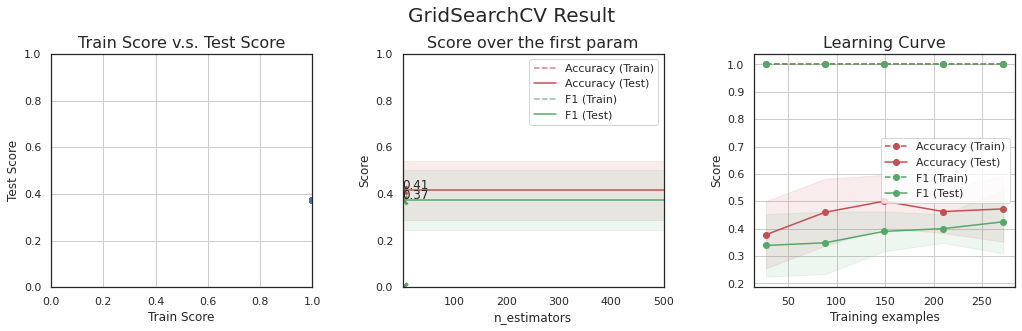

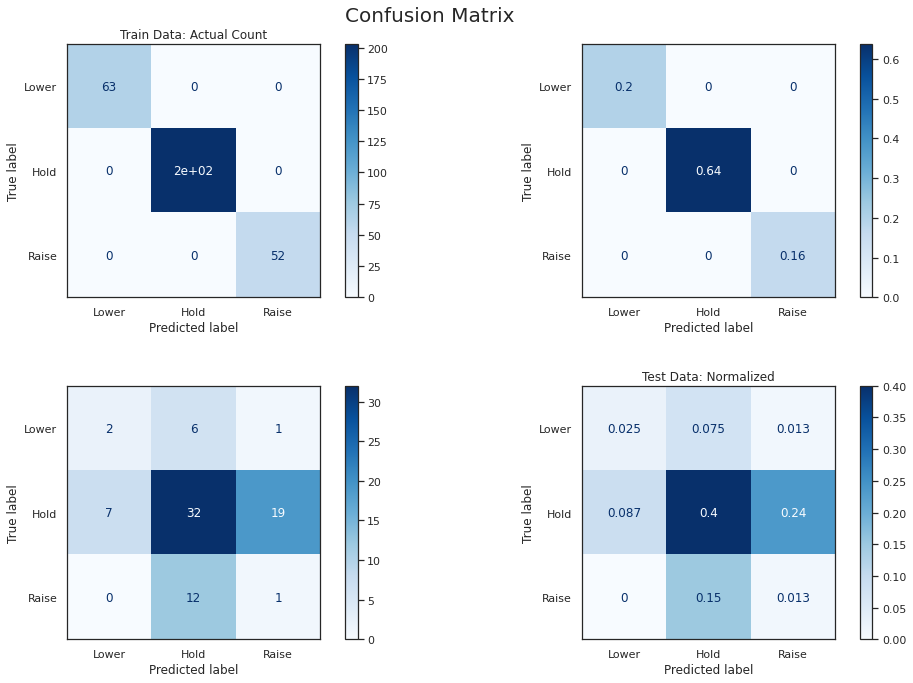

In [ ]:
param_grid = {'n_estimators': np.linspace(1, 500, 50, dtype=int),
              'base_estimator__criterion': ['gini'],
              'base_estimator__splitter': ['random'],
              'algorithm': ['SAMME.R'],
              'learning_rate': [0.01]}

ada_model = train_grid_search(ada_clf, param_grid, scoring, refit, cv=kfold, verbose=1, plot=True)
ada_best = ada_model.best_estimator_

### Extra Tree

In [ ]:
ext_clf = ExtraTreesClassifier()

rand_param_grid = {"max_depth": [None],
              "max_features": [1, 2, 3, 5],
              "min_samples_split": [2, 3, 5, 10, 20],
              "min_samples_leaf": [1, 3, 5, 7, 10],
              "bootstrap": [False],
              "n_estimators" : [1, 2, 5, 10, 20, 100, 200, 1000],
              "criterion": ["gini"]}

rand_model = RandomizedSearchCV(estimator=ext_clf, 
                                param_distributions=rand_param_grid, 
                                n_iter=300, 
                                cv=kfold, 
                                scoring=scoring[refit], 
                                verbose=1, 
                                random_state=rand_seed,
                                n_jobs=-1)
rand_model.fit(X_train,Y_train)
print(rand_model.best_score_)
print(rand_model.best_params_)

Fitting 7 folds for each of 300 candidates, totalling 2100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 392 tasks      | elapsed:   25.5s
[Parallel(n_jobs=-1)]: Done 1109 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 1942 tasks      | elapsed:  1.9min


0.519764562959472
{'n_estimators': 5, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 2, 'max_depth': None, 'criterion': 'gini', 'bootstrap': False}


[Parallel(n_jobs=-1)]: Done 2100 out of 2100 | elapsed:  2.0min finished


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 7 folds for each of 50 candidates, totalling 350 fits


[Parallel(n_jobs=-1)]: Done 200 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 350 out of 350 | elapsed:    7.6s finished
[2021-01-25 12:30:25,724][INFO] ## Training - acc: 0.68867925, f1: 0.56283030
[2021-01-25 12:30:25,725][INFO] ## Test - acc: 0.66250000, f1: 0.31225009


Best Score:  0.5146332790798632
Best Param:  {'bootstrap': False, 'criterion': 'gini', 'max_depth': None, 'max_features': 8, 'min_samples_leaf': 10, 'min_samples_split': 5, 'n_estimators': 1}


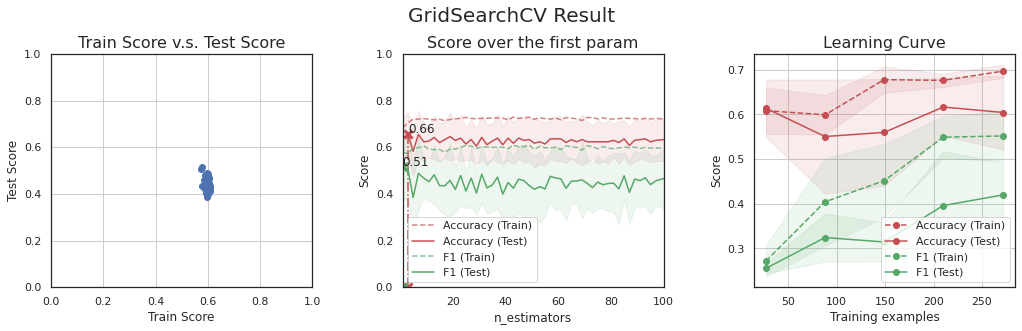

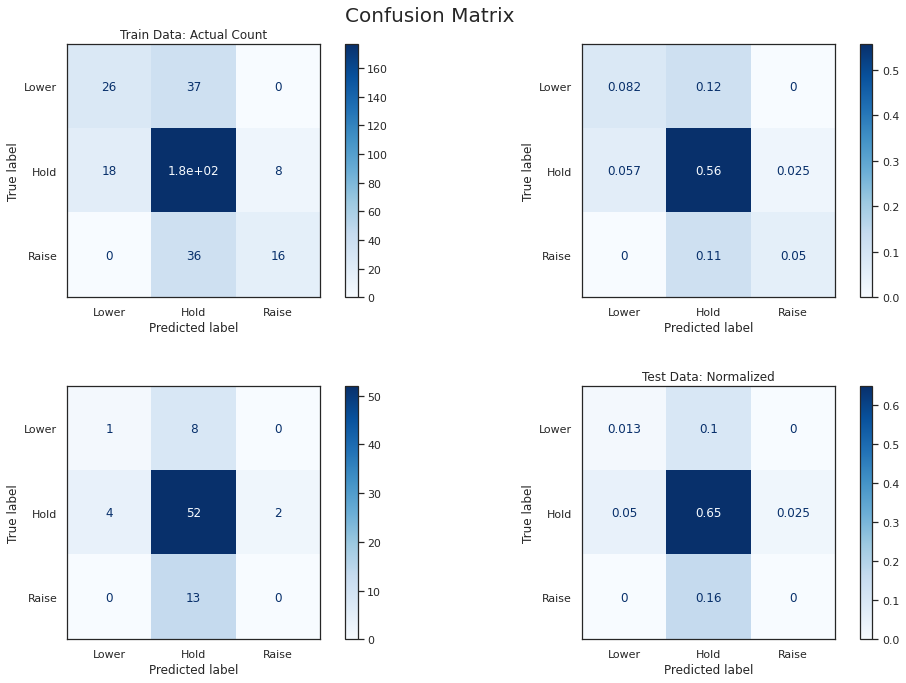

In [ ]:
param_grid = {'n_estimators': np.linspace(1, 100, 50, dtype=int),
              'min_samples_split': [5],
              'min_samples_leaf': [10],
              'max_features': [8],
              'max_depth': [None],
              'criterion': ['gini'],
              'bootstrap': [False]}

ext_model = train_grid_search(ext_clf, param_grid, scoring, refit, cv=kfold, verbose=1, plot=True)
ext_best = ext_model.best_estimator_

### Random Forest

In [ ]:
rf_clf = RandomForestClassifier()

rand_param_grid = {"max_depth": [None],
              "max_features": [1, 2, 3, 5],
              "min_samples_split": [2, 3, 5, 7, 10],
              "min_samples_leaf": [1, 3, 5, 7, 10, 15],
              "bootstrap": [False],
              "n_estimators" :[1, 2, 5, 10, 100, 200, 300, 500, 1000],
              "criterion": ["gini"]}

rand_model = RandomizedSearchCV(estimator=rf_clf, 
                                param_distributions=rand_param_grid, 
                                n_iter=300, 
                                cv=kfold, 
                                scoring=scoring[refit], 
                                verbose=1, 
                                 random_state=rand_seed, n_jobs=-1)
rand_model.fit(X_train,Y_train)
print(rand_model.best_score_)
print(rand_model.best_params_)

Fitting 7 folds for each of 300 candidates, totalling 2100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 252 tasks      | elapsed:   23.8s
[Parallel(n_jobs=-1)]: Done 650 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1261 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 1902 tasks      | elapsed:  3.3min


0.5653566171077676
{'n_estimators': 2, 'min_samples_split': 7, 'min_samples_leaf': 10, 'max_features': 1, 'max_depth': None, 'criterion': 'gini', 'bootstrap': False}


[Parallel(n_jobs=-1)]: Done 2100 out of 2100 | elapsed:  3.5min finished


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 7 folds for each of 50 candidates, totalling 350 fits


[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done 284 tasks      | elapsed:   39.3s
[Parallel(n_jobs=-1)]: Done 350 out of 350 | elapsed:   59.2s finished
[2021-01-25 12:34:55,180][INFO] ## Training - acc: 0.92767296, f1: 0.90735967
[2021-01-25 12:34:55,182][INFO] ## Test - acc: 0.62500000, f1: 0.50148544


Best Score:  0.5198793780563115
Best Param:  {'bootstrap': False, 'criterion': 'gini', 'max_depth': None, 'max_features': 8, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 62}


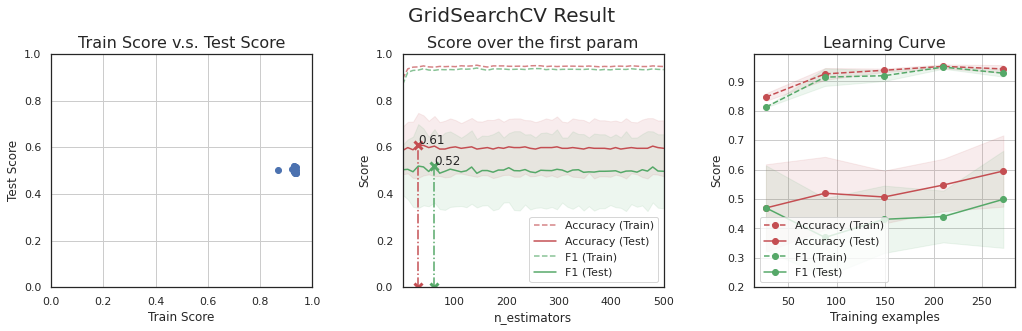

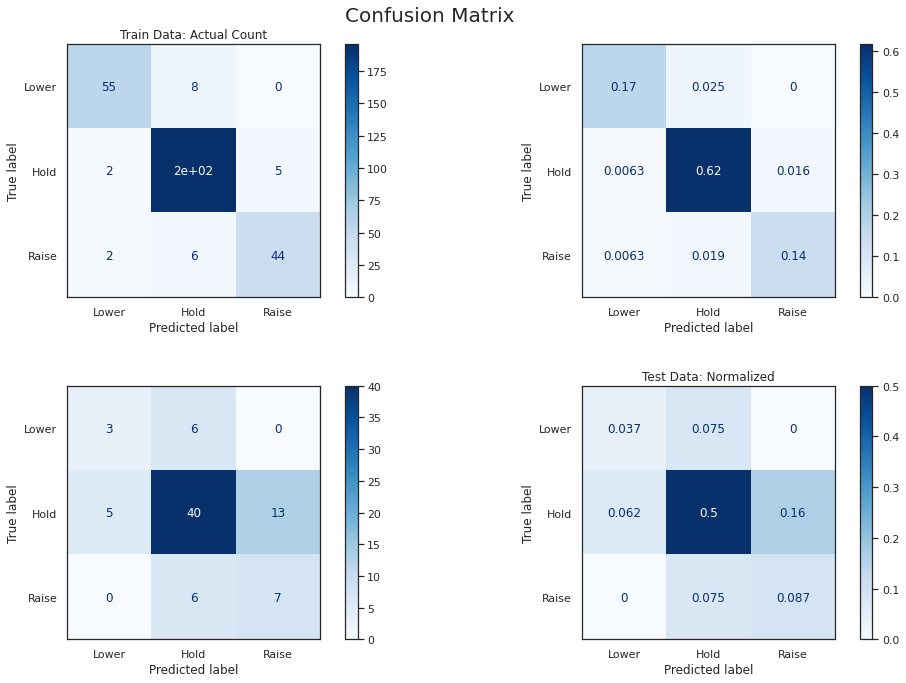

In [ ]:
param_grid = {'n_estimators': np.linspace(1, 500, 50, dtype=int),
              'min_samples_split': [2],
              'min_samples_leaf': [3],
              'max_features': [8],
              'max_depth': [None],
              'criterion': ['gini'],
              'bootstrap': [False]}

rf_model = train_grid_search(rf_clf, param_grid, scoring, refit, cv=kfold, verbose=1, plot=True)
rf_best = rf_model.best_estimator_

### Gradient Boosting

In [ ]:
gb_clf = GradientBoostingClassifier()

rand_param_grid = {
    'loss' : ["deviance"],
    'n_estimators' : [1, 10, 100, 200, 300, 1000],
    'learning_rate': [0.1, 0.05, 0.01, 0.005],
    'max_depth': [2, 4, 6, 8, 10],
    'min_samples_leaf': [2, 5, 10, 15, 20, 30, 50, 100, 200, 300],
    'max_features': [0.8, 0.6, 0.4, 0.2, 0.1]
    }

rand_model = RandomizedSearchCV(estimator=gb_clf, 
                                param_distributions=rand_param_grid, 
                                n_iter=300, 
                                cv=kfold, 
                                scoring=scoring[refit], 
                                verbose=1, 
                                random_state=rand_seed, 
                                n_jobs=-1)

rand_model.fit(X_train,Y_train)
print(rand_model.best_score_)
print(rand_model.best_params_)

Fitting 7 folds for each of 300 candidates, totalling 2100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:   28.5s
[Parallel(n_jobs=-1)]: Done 208 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 490 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 901 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 1430 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 2060 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done 2093 out of 2100 | elapsed:  8.4min remaining:    1.7s
[Parallel(n_jobs=-1)]: Done 2100 out of 2100 | elapsed:  8.4min finished


0.5230603358290681
{'n_estimators': 1000, 'min_samples_leaf': 15, 'max_features': 0.4, 'max_depth': 2, 'loss': 'deviance', 'learning_rate': 0.01}


Fitting 7 folds for each of 50 candidates, totalling 350 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 119 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:   38.9s
[Parallel(n_jobs=-1)]: Done 350 out of 350 | elapsed:  1.1min finished
[2021-01-25 12:44:30,595][INFO] ## Training - acc: 0.88679245, f1: 0.85955164
[2021-01-25 12:44:30,597][INFO] ## Test - acc: 0.68750000, f1: 0.44000000


Best Score:  0.5256642087094295
Best Param:  {'learning_rate': 0.05, 'loss': 'deviance', 'max_depth': 2, 'max_features': 0.6, 'min_samples_leaf': 15, 'n_estimators': 214}


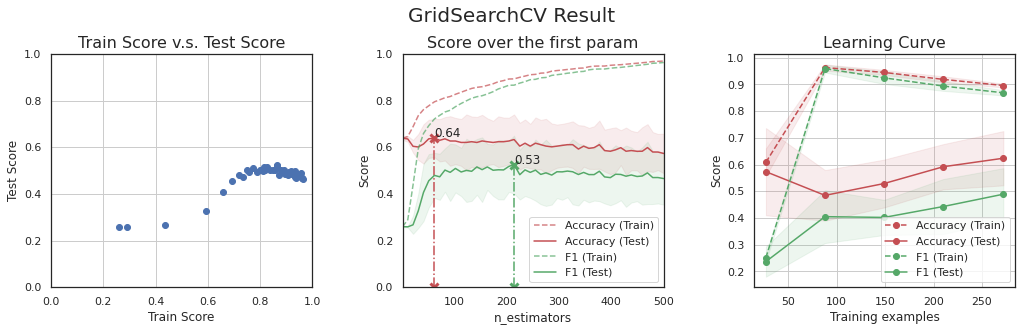

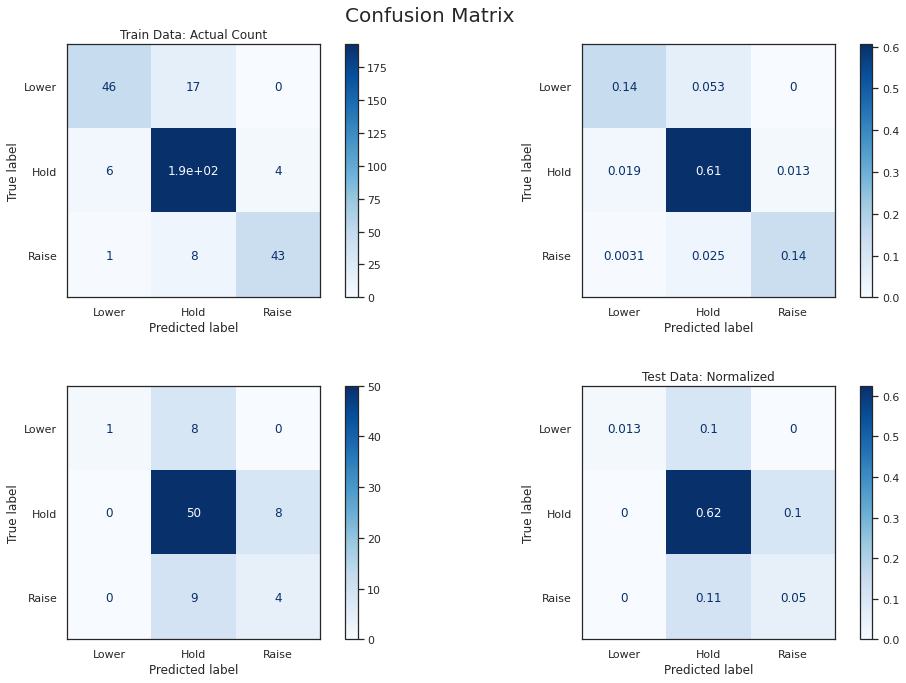

In [ ]:
param_grid = {'n_estimators': np.linspace(1, 500, 50, dtype=int),
              'min_samples_leaf': [15],
              'max_features': [0.6],
              'max_depth': [2],
              'loss': ['deviance'],
              'learning_rate': [0.05]}

gb_model = train_grid_search(gb_clf, 
                             param_grid, 
                             scoring, 
                             refit, 
                             cv=kfold, 
                             verbose=1, 
                             plot=True)

gb_best = gb_model.best_estimator_

### SVM

In [ ]:
svm_clf = SVC(probability=True)

rand_param_grid = {'kernel': ['rbf'], 
                  'gamma': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1],
                  'C': [1, 2, 3, 5, 8, 10, 50, 100, 200, 300, 500, 1000]}

rand_model = RandomizedSearchCV(estimator=svm_clf, 
                                param_distributions=rand_param_grid, 
                                n_iter=300, 
                                cv=kfold, 
                                scoring=scoring[refit], 
                                verbose=1, 
                                random_state=rand_seed, 
                                n_jobs=-1)

rand_model.fit(X_train,Y_train)
print(rand_model.best_score_)
print(rand_model.best_params_)

Fitting 7 folds for each of 84 candidates, totalling 588 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:    1.3s


0.4645510437396955
{'kernel': 'rbf', 'gamma': 0.001, 'C': 100}


[Parallel(n_jobs=-1)]: Done 581 out of 588 | elapsed:    6.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 588 out of 588 | elapsed:    6.2s finished


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 7 folds for each of 50 candidates, totalling 350 fits


[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 350 out of 350 | elapsed:    4.1s finished
[2021-01-25 12:44:51,591][INFO] ## Training - acc: 0.83018868, f1: 0.77562130
[2021-01-25 12:44:51,593][INFO] ## Test - acc: 0.62500000, f1: 0.37328491


Best Score:  0.42960685147685435
Best Param:  {'C': 10, 'gamma': 0.0021387755102040816, 'kernel': 'rbf'}


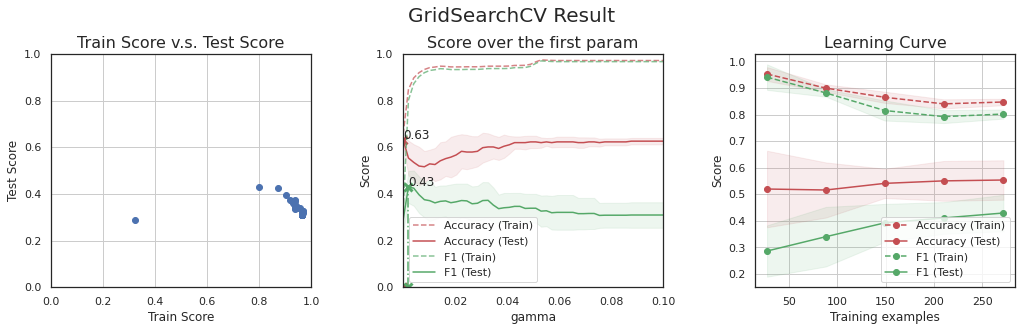

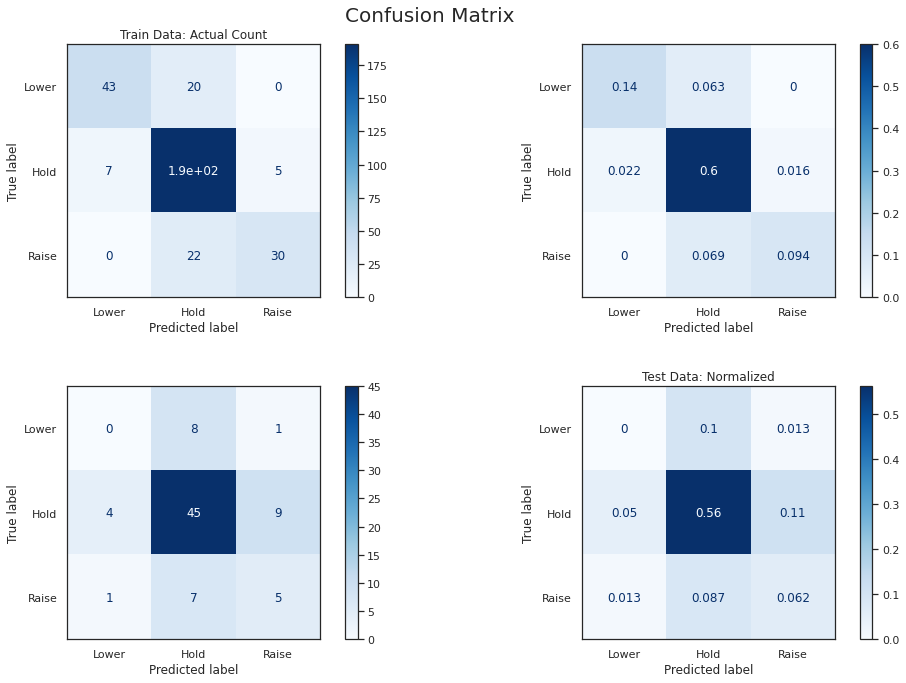

In [ ]:
param_grid = {'gamma': np.linspace(0.0001, 0.1, 50, dtype=float),
              'C': [10],
              'kernel': ['rbf']}

svm_model = train_grid_search(svm_clf, 
                              param_grid, 
                              scoring, 
                              refit, 
                              cv=kfold, 
                              verbose=1, 
                              plot=True)

svm_best = svm_model.best_estimator_

### Feature Importance
Check feature importance on four tree-based classifiers out of ten.

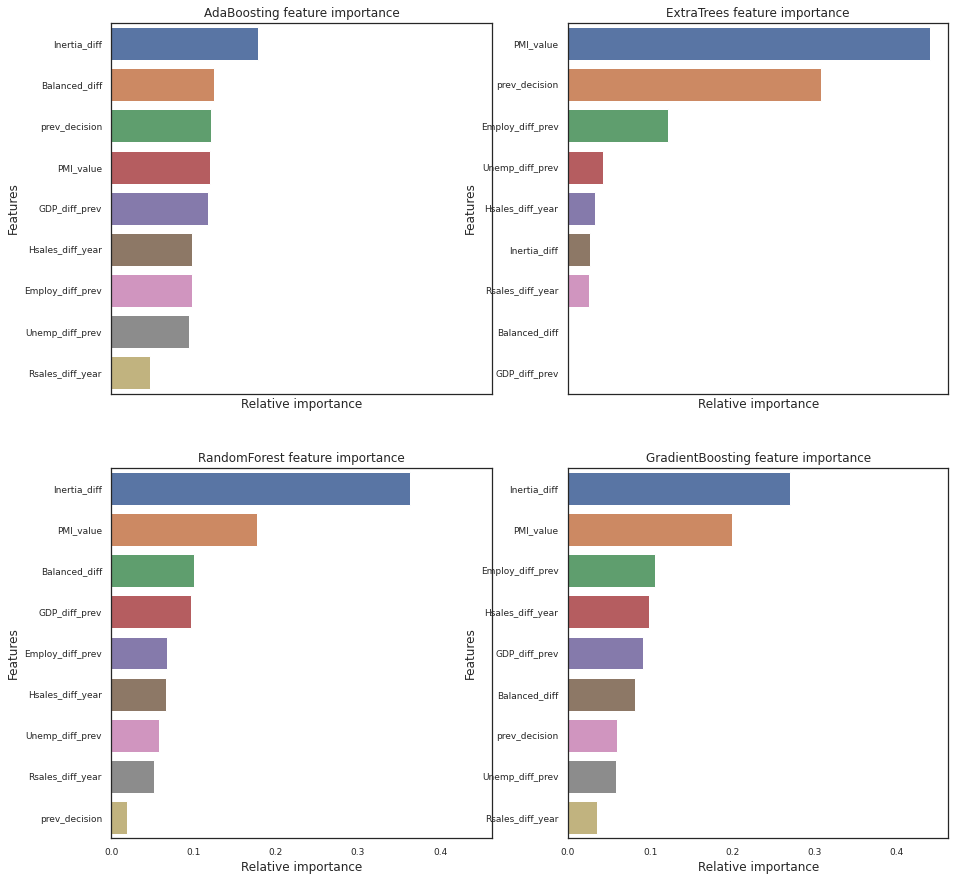

In [ ]:
nrows = ncols = 2
fig, axes = plt.subplots(nrows = nrows, ncols = ncols, sharex="all", figsize=(15,15))

names_classifiers = [("AdaBoosting", ada_best), 
                     ("ExtraTrees", ext_best), 
                     ("RandomForest", rf_best), 
                     ("GradientBoosting",gb_best)]

nclassifier = 0
for row in range(nrows):
    for col in range(ncols):
        name = names_classifiers[nclassifier][0]
        classifier = names_classifiers[nclassifier][1]
        indices = np.argsort(classifier.feature_importances_)[::-1][:40]
        g = sns.barplot(y=X_balanced.columns[indices][:40], x=classifier.feature_importances_[indices][:40] , orient='h',ax=axes[row][col])
        g.set_xlabel("Relative importance",fontsize=12)
        g.set_ylabel("Features",fontsize=12)
        g.tick_params(labelsize=9)
        g.set_title(name + " feature importance")
        nclassifier += 1

### Ensembling

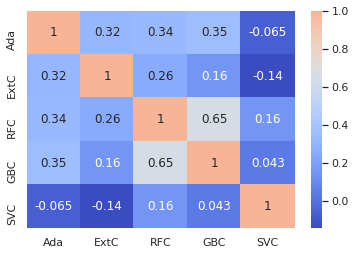

In [ ]:
test_ada = pd.Series(ada_best.predict(X_test), name="Ada")
test_ext = pd.Series(ext_best.predict(X_test), name="ExtC")
test_rf = pd.Series(rf_best.predict(X_test), name="RFC")
test_gb = pd.Series(gb_best.predict(X_test), name="GBC")
test_svm = pd.Series(svm_best.predict(X_test), name="SVC")

ensemble_results = pd.concat([test_ada, test_ext, test_rf, test_gb, test_svm],axis=1)

g = sns.heatmap(ensemble_results.corr(),annot=True, cmap="coolwarm", center=0.7)

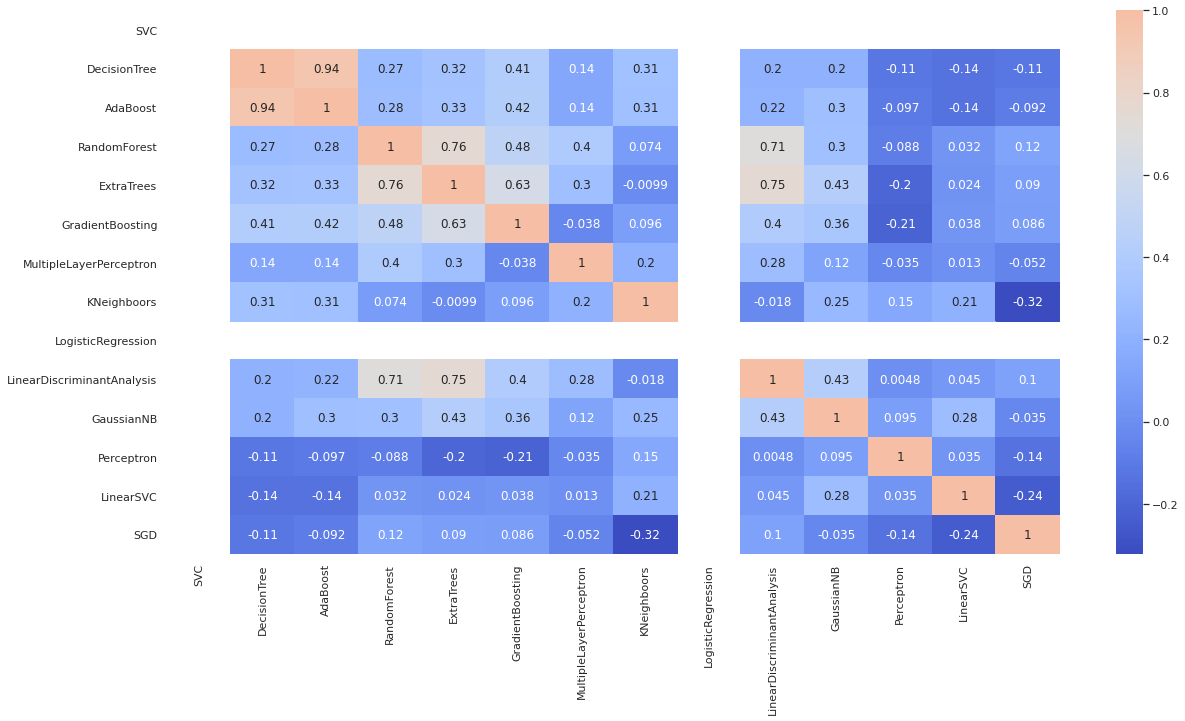

In [ ]:
test_resuts = []

for classifier in classifiers:
    estimator = classifier[1].fit(X_train, Y_train)
    test_resuts.append(pd.Series(estimator.predict(X_test), name=classifier[0]))

base_results = pd.concat(test_resuts, axis=1)

plt.figure(figsize=(20,10))
g = sns.heatmap(base_results.corr(),annot=True, cmap="coolwarm", center=0.7)

### Voting Classifier

In [ ]:
voting_best = VotingClassifier(estimators=[('adac', ada_best),
                                           ('extc', ext_best), 
                                           ('rfc', rf_best), 
                                           ('gbc', gb_best), 
                                           ('svmc', svm_best)], voting='soft', n_jobs=-1)

voting_best.fit(X_train, Y_train)

VotingClassifier(estimators=[('adac',
                              AdaBoostClassifier(algorithm='SAMME.R',
                                                 base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                                                       class_weight=None,
                                                                                       criterion='gini',
                                                                                       max_depth=None,
                                                                                       max_features=None,
                                                                                       max_leaf_nodes=None,
                                                                                       min_impurity_decrease=0.0,
                                                                                       min_impurity_split=None,
                                    

In [ ]:
voting_pred_train = voting_best.predict(X_train)
voting_pred_test = voting_best.predict(X_test)

acc, f1 = metric(Y_train, voting_pred_train)
logger.info('Training - acc: %.8f, f1: %.8f' % (acc, f1))

acc, f1 = metric(Y_test, voting_pred_test)
logger.info('Test - acc: %.8f, f1: %.8f' % (acc, f1))

[2021-01-25 12:44:57,156][INFO] ## Training - acc: 0.95597484, f1: 0.94641285
[2021-01-25 12:44:57,158][INFO] ## Test - acc: 0.62500000, f1: 0.31076389


### Stacking by XGBoost

In [ ]:
# Class to get out-of-fold predictions
def get_oof(clf, x_train, y_train, x_test):
    #Set parameters for ensembling
    n_train = x_train.shape[0]
    n_test = x_test.shape[0]
    oof_train = np.zeros((n_train,))
    oof_test = np.zeros((n_test,))
    oof_test_skf = np.empty((n_fold, n_test))
    
    for i, (train_index, test_index) in enumerate(kfold.split(y_train, y_train)):
        x_tr = x_train[train_index]
        y_tr = y_train[train_index]
        x_te = x_train[test_index]
        
        clf.fit(x_tr, y_tr)
        
        oof_train[test_index] = clf.predict(x_te)
        oof_test_skf[i, :] = clf.predict(x_test)
        
    oof_test[:] = oof_test_skf.mean(axis=0)
    return oof_train.reshape(-1,1), oof_test.reshape(-1, 1)

In [ ]:
# Create OOF train and test predictions.
ada_oof_train, ada_oof_test = get_oof(ada_best, X_train, Y_train, X_test) # AdaBoost 
ext_oof_train, ext_oof_test = get_oof(ext_best, X_train, Y_train, X_test) # Extra Trees
rf_oof_train, rf_oof_test = get_oof(rf_best, X_train, Y_train, X_test) # Random Forest
gb_oof_train, gb_oof_test = get_oof(gb_best, X_train, Y_train, X_test) # Gradient Boost
svmc_oof_train, svmc_oof_test = get_oof(svm_best, X_train, Y_train, X_test) # Support Vector Classifier

In [ ]:
X_train_xgb = np.concatenate((ada_oof_train, ext_oof_train, rf_oof_train, gb_oof_train, svmc_oof_train), axis=1)
X_test_xgb = np.concatenate((ada_oof_test, ext_oof_test, rf_oof_test, gb_oof_test, svmc_oof_test), axis=1)

In [ ]:
gbm = xgb.XGBClassifier(
    n_estimator=2000,
    max_depth=4,
    min_child_weight=2,
    gamma=0.9,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='binary:logistic',
    nthread=-1,
    scale_pos_weight=1).fit(X_train_xgb, Y_train)

# Predict
gbm_pred_train = gbm.predict(X_train_xgb)
gbm_pred_test = gbm.predict(X_test_xgb)

xgb_acc_train, xgb_f1_train = metric(Y_train, gbm_pred_train)
logger.info('Train - acc: %.8f, f1: %.8f' % (xgb_acc_train, xgb_f1_train))

xgb_acc_test, xgb_f1_test = metric(Y_test, gbm_pred_test)
logger.info('Test - acc: %.8f, f1: %.8f' % (xgb_acc_test, xgb_f1_test))

[2021-01-25 12:45:00,981][INFO] ## Train - acc: 0.72641509, f1: 0.60388454
[2021-01-25 12:45:00,983][INFO] ## Test - acc: 0.75000000, f1: 0.46108140


[12:45:00] WARNING: ../src/learner.cc:516: 
Parameters: { n_estimator, scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




### Result

In [ ]:
result_clf = [('AdaDTC', ada_best),
              ('ExtraTree', ext_best), 
              ('RandomForest', rf_best),
              ('GradientBoost', gb_best), 
              ('SVM', svm_best),
              ('Voting', voting_best)]

results = []

for clf in result_clf:
    pred_train = clf[1].predict(pd.DataFrame(X_train))
    pred_test = clf[1].predict(pd.DataFrame(X_test))
    train_acc, train_f1 = metric(Y_train, pred_train)
    test_acc, test_f1 = metric(Y_test, pred_test)
    results.append((clf[0], 
                    train_acc, 
                    train_f1, 
                    test_acc, 
                    test_f1))

result_df = pd.DataFrame(results, columns=[
                                           'Classifier', 
                                           'Train Accuracy', 
                                           'Train F1', 
                                           'Test Accuracy', 
                                           'Test F1'
                                           ]
                         )
result_df

,Classifier,Train Accuracy,Train F1,Test Accuracy,Test F1
0,AdaDTC,0.896226,0.879437,0.4750,0.320101
1,ExtraTree,0.682390,0.554694,0.6125,0.253230
2,RandomForest,0.921384,0.906394,0.7125,0.417893
3,GradientBoost,0.864780,0.831184,0.7000,0.426677
4,SVM,0.808176,0.739655,0.6250,0.366667
5,Voting,0.955975,0.946413,0.6250,0.310764


In [ ]:
# Set Random Forest as the baseline model (highest F1 score)
baseline_model = rf_best
pred_test = baseline_model.predict(pd.DataFrame(X_test))
prediction_df = pd.concat([pd.Series(balanced.index.values), pd.Series(pred_test, name="Predict")],axis=1)

## **Save Data**

In [ ]:
# Save result
save_data(result_df, "result_scores", output_dir)
save_data(prediction_df, "baseline_predictions")
save_data(X_balanced, "training_data", output_dir, index_csv=True)


Successfully saved result_scores.pickle. in /content/drive/My Drive/Colab Notebooks/proj2/src/data/result/result_scores.pickle
Successfully saved result_scores.csv. in /content/drive/My Drive/Colab Notebooks/proj2/src/data/result/result_scores.csv
Successfully saved baseline_predictions.pickle. in /content/drive/My Drive/Colab Notebooks/proj2/src/data/result/baseline_predictions.pickle
Successfully saved baseline_predictions.csv. in /content/drive/My Drive/Colab Notebooks/proj2/src/data/result/baseline_predictions.csv
Successfully saved training_data.pickle. in /content/drive/My Drive/Colab Notebooks/proj2/src/data/result/training_data.pickle
Successfully saved training_data.csv. in /content/drive/My Drive/Colab Notebooks/proj2/src/data/result/training_data.csv


################################################################################

# **Good Plotting Practices**

In [ ]:
## Visualize ETF Price Time Series:
#fig = plt.figure(figsize=(15, 7.5))
#ts_u = fig.add_subplot(111)
#ts_u.plot(R_u['FXE'], linewidth=0.5, alpha=0.9, label='FXE')
#ts_u.plot(R_u['EWJ'], linewidth=0.5, alpha=0.9, label='EWJ')
#ts_u.plot(R_u['GLD'], linewidth=0.5, alpha=0.9, label='GLD')
#ts_u.plot(R_u['QQQ'], linewidth=0.5, alpha=0.9, label='QQQ')
#ts_u.plot(R_u['SPY'], linewidth=0.5, alpha=0.9, label='SPY')
#ts_u.plot(R_u['SHV'], linewidth=0.5, alpha=0.9, label='SHV')
#ts_u.plot(R_u['DBA'], linewidth=0.5, alpha=0.9, label='DBA')
#ts_u.plot(R_u['USO'], linewidth=0.5, alpha=0.9, label='USO')
#ts_u.plot(R_u['XBI'], linewidth=0.5, alpha=0.9, label='XBI')
#ts_u.plot(R_u['ILF'], linewidth=0.5, alpha=0.9, label='ILF')
#ts_u.plot(R_u['EPP'], linewidth=0.5, alpha=0.9, label='EPP')
#ts_u.plot(R_u['FEZ'], linewidth=0.5, alpha=0.9, label='FEZ')
#ts_u.set_xlabel('Year', fontweight='bold', fontsize=12)
#ts_u.set_ylabel('Price', fontweight='bold', fontsize=12)
#ts_u.set_title('Historical Time Series of Portfolio Securities', fontweight='bold', fontsize=15)
#ts_u.legend(loc='upper right', fontsize=10)
#plt.savefig(graphs_dir + 'rho_u.png', bbox_inches='tight')


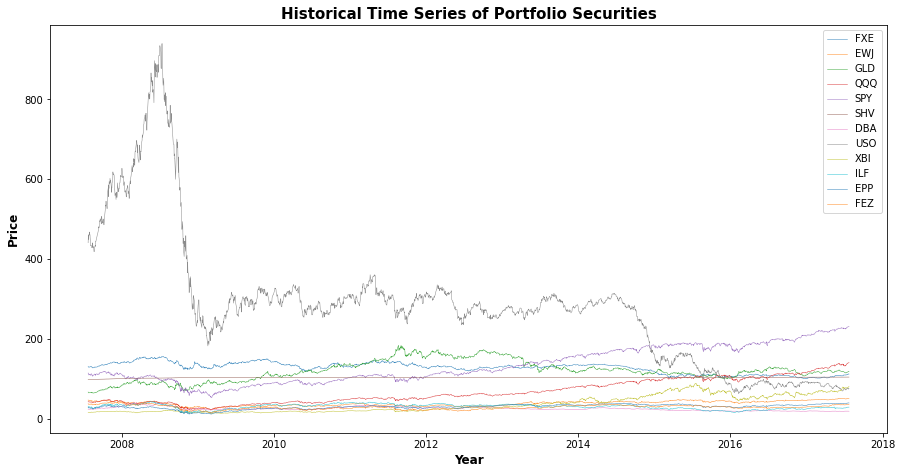

In [ ]:
## Visualize ETF Price Time Series:
#R_u = p_u
#returns_u, axs = plt.subplots(4,3,figsize=(15, 7.5))
#returns_u.suptitle('Historical Time Series of Portfolio Securities', fontweight='bold', fontsize=15)
#axs[0,0].plot(R_u['FXE'], 'black', linewidth=0.5, alpha=0.9)
#axs[0,0].set_title('FXE')
#axs[0,1].plot(R_u['EWJ'], 'black', linewidth=0.5, alpha=0.9)
#axs[0,1].set_title('EWJ')
#axs[0,2].plot(R_u['GLD'], 'black', linewidth=0.5, alpha=0.9)
#axs[0,2].set_title('GLD')
#axs[1,0].plot(R_u['QQQ'], 'black', linewidth=0.5, alpha=0.9)
#axs[1,0].set_title('QQQ')
#axs[1,1].plot(R_u['SPY'], 'black', linewidth=0.5, alpha=0.9)
#axs[1,1].set_title('SPY')
#axs[1,2].plot(R_u['SHV'], 'black', linewidth=0.5, alpha=0.9)
#axs[1,2].set_title('SHV')
#axs[2,0].plot(R_u['DBA'], 'black', linewidth=0.5, alpha=0.9)
#axs[2,0].set_title('DBA')
#axs[2,1].plot(R_u['USO'], 'black', linewidth=0.5, alpha=0.9)
#axs[2,1].set_title('USO')
#axs[2,2].plot(R_u['XBI'], 'black', linewidth=0.5, alpha=0.9)
#axs[2,2].set_title('XBI')
#axs[3,0].plot(R_u['ILF'], 'black', linewidth=0.5, alpha=0.9)
#axs[3,0].set_title('ILF')
#axs[3,1].plot(R_u['EPP'], 'black', linewidth=0.5, alpha=0.9)
#axs[3,1].set_title('EPP')
#axs[3,2].plot(R_u['FEZ'], 'black', linewidth=0.5, alpha=0.9)
#axs[3,2].set_title('FEZ')
#plt.tight_layout()
#returns_u.subplots_adjust(top=0.9)
#plt.savefig(graphs_dir + 'prices_u_raw.png', bbox_inches='tight')


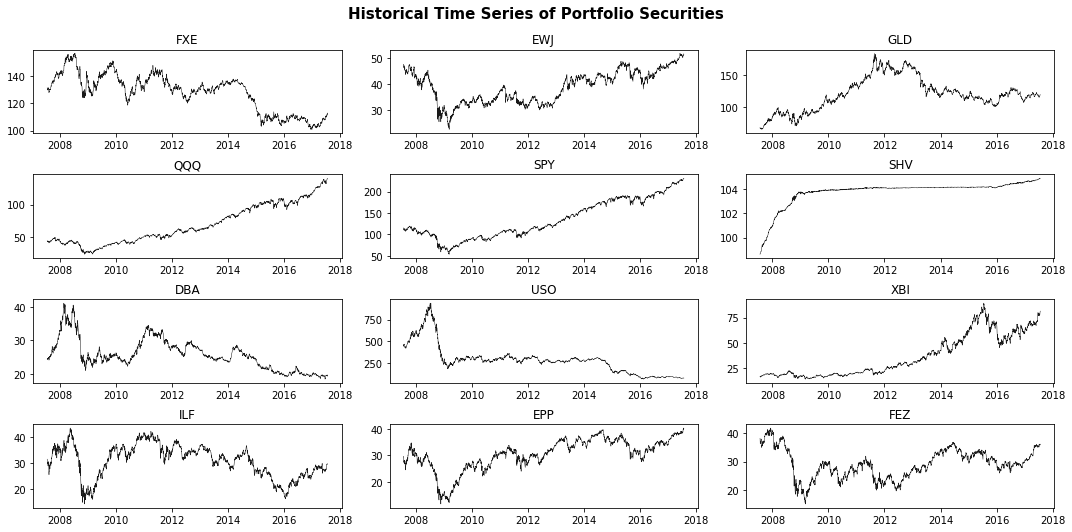

In [ ]:
#fig = plt.figure(figsize=(20, 20))
#ax = fig.add_subplot(111, projection='3d')
#for i in range(6):
#  dt = pre_subprime_final.iloc[:,i]
#  col_name = pre_subprime_final.columns[i]
#  c =  ['r', 'g', 'b', 'y', 'm','orange'][i]
#  z =  [-1.0, -0.5, 0.5, 1.0, 1.5, 2.0][i]
#  x,y = np.histogram(dt,bins = 100)
#  x = x/len(dt)
#  y = (y[:-1]+y[1:])/2
#  cs = [c] * len(x)
#  ax.bar(y, x, zs=z, zdir='y', color=cs, alpha=0.7,width = 0.003,label = col_name[0]+', '+col_name[1])
#  ax.legend(loc='left', fontsize=13)
#
#  samples = np.asarray(dt).reshape(-1,1)
#  x_plot = np.linspace(-10,10,100).reshape(-1,1)
#  kde = KernelDensity(kernel='gaussian', bandwidth=0.9).fit(samples)
#  log_dens = kde.score_samples(x_plot)
#  dens = np.exp(log_dens)
#  ax.view_init(20, 50)
#  ax.plot(x_plot / 50, [z] * len(y), dens / 8, color = 'black', linewidth = 3.0)
#ax.set_xlabel('$ρ$', fontweight='bold', fontsize=15)
#ax.set_ylabel('$β$', fontweight='bold', fontsize=15)
#ax.set_zlabel('$f$', fontweight='bold', fontsize=15)
#ax.set_title('$S_{60}^{60}$ Returns Before the Subprime Crisis', fontweight='bold', fontsize=18)
#
#plt.savefig(graphs_dir + '01_pre_subprime_ret_distS6060.png', bbox_inches='tight')


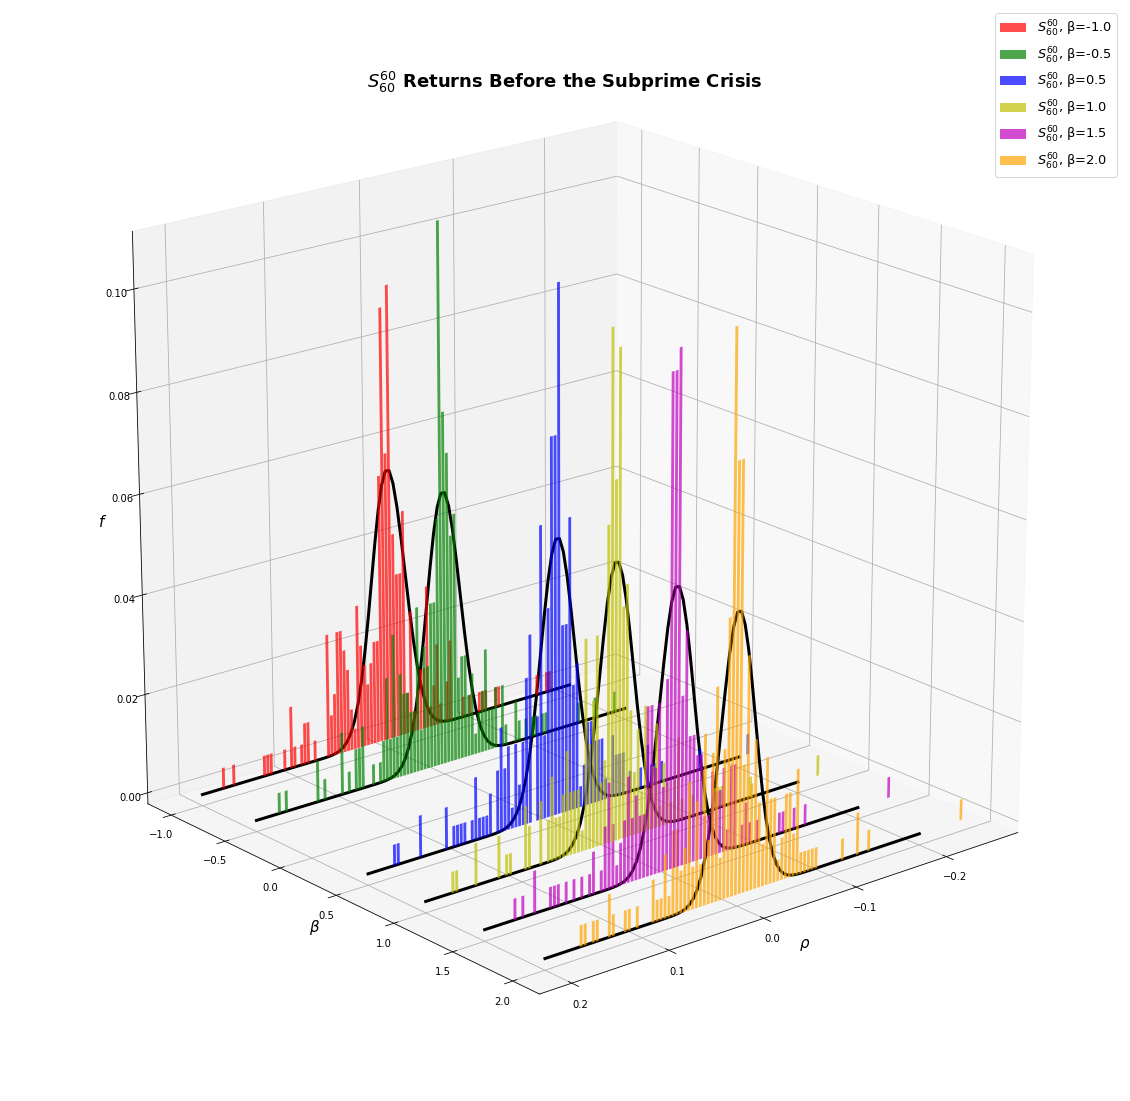

In [ ]:
## Pre-Subprime Crisis:
#pre_subprime_R_u = R_etf.loc[:'3/3/2008',:'FEZ']
#pre_subprime_ff_factors = ff_3_daily.loc[:'3/3/2008','Mkt-RF':'RF']
#pre_subprime_lookbacks = [[60,60], [60,120], [90,60], [90,120], [120,60], [120,120]]
#pre_subprime_betas = [-1.0, -0.5, 0.5, 1.0, 1.5, 2.0]
#pre_subprime_exec = pd.DataFrame([])
#pre_subprime_final = pd.DataFrame([])
#omegas = []
#for lb in pre_subprime_lookbacks:
#    for bt in pre_subprime_betas:
#        res = backtesting(pre_subprime_R_u,
#                        pre_subprime_ff_factors,
#                        return_period = lb[0],
#                        variance_period = lb[1],
#                        lamb = 10,
#                        beta_tm = bt)
#        omegas.append(res[1])
#        res = pd.DataFrame(res[0],index = pd.to_datetime(pre_subprime_R_u.index))
#        res_perf = analytics(X = res,rf = 0.06, confidenceLevel = 0.95, position = 100)
#        pre_subprime_final = pd.concat([pre_subprime_final,res],axis = 1)
#        pre_subprime_exec = pd.concat([pre_subprime_exec,res_perf],axis = 1)
#        
#pre_subprime_final = pd.concat([pre_subprime_final,pre_subprime_R_u['SPY']],axis = 1)
#
#pre_subprime_spy_performance = analytics(X = pd.DataFrame(pre_subprime_R_u.loc[:,'SPY']),rf = 0.06, confidenceLevel = 0.95, position = 100)
#pre_subprime_exec = pd.concat([pre_subprime_exec,pre_subprime_spy_performance],axis = 1)
#pre_subprime_exec.columns = [['$S^{60}_{60}$','$S^{60}_{60}$','$S^{60}_{60}$','$S^{60}_{60}$','$S^{60}_{60}$','$S^{60}_{60}$',
#                                  '$S^{60}_{120}$','$S^{60}_{120}$','$S^{60}_{120}$','$S^{60}_{120}$','$S^{60}_{120}$','$S^{60}_{120}$',
#                                  '$S^{90}_{60}$','$S^{90}_{60}$','$S^{90}_{60}$','$S^{90}_{60}$','$S^{90}_{60}$','$S^{90}_{60}$',
#                                  '$S^{90}_{120}$','$S^{90}_{120}$','$S^{90}_{120}$','$S^{90}_{120}$','$S^{90}_{120}$','$S^{90}_{120}$',
#                                  '$S^{120}_{60}$','$S^{120}_{60}$','$S^{120}_{60}$','$S^{120}_{60}$','$S^{120}_{60}$','$S^{120}_{60}$',
#                                  '$S^{120}_{120}$','$S^{120}_{120}$','$S^{120}_{120}$','$S^{120}_{120}$','$S^{120}_{120}$','$S^{120}_{120}$','SPY'],
#                                 ['β=-1.0','β=-0.5','β=0.5','β=1.0','β=1.5','β=2.0',
#                                  'β=-1.0','β=-0.5','β=0.5','β=1.0','β=1.5','β=2.0',
#                                  'β=-1.0','β=-0.5','β=0.5','β=1.0','β=1.5','β=2.0',
#                                  'β=-1.0','β=-0.5','β=0.5','β=1.0','β=1.5','β=2.0',
#                                  'β=-1.0','β=-0.5','β=0.5','β=1.0','β=1.5','β=2.0',
#                                  'β=-1.0','β=-0.5','β=0.5','β=1.0','β=1.5','β=2.0','']]
#pre_subprime_final.columns = pre_subprime_exec.columns
#save_data(pre_subprime_exec, 'pre_subprime_exec')


In [ ]:
## Total Value:
#fig = plt.figure(figsize=(20, 10))
#ax = fig.add_subplot(111)
#for i in range(36):
#  ax.plot(100*(np.cumprod(pre_subprime_final.iloc[:,i]+1)),label = pre_subprime_final.columns[i][0]+', '+pre_subprime_final.columns[i][1])
#  ax.legend(loc='best', ncol=4, fontsize=10)
#plt.xlabel('t', fontweight='bold', fontsize=15)
#plt.ylabel('Value', fontweight='bold', fontsize=15)
#plt.title('Value of Investment Strategies Before the Subprime Crisis', fontweight='bold', fontsize=18)
#plt.savefig(graphs_dir + '00_pre_subprime_strategy_val.png', bbox_inches='tight')


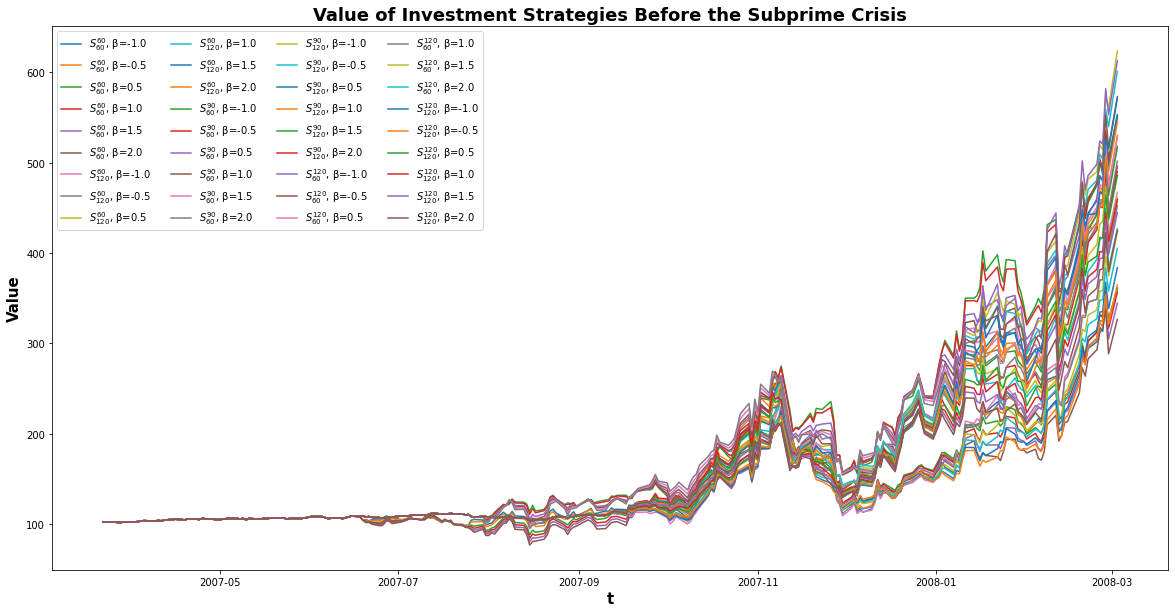

In [ ]:
#fig = plt.figure(figsize=(20, 10))
#ax = fig.add_subplot(111)
#for i in range(36):
#  ax.plot(100*(np.cumprod(full_horizon_final.iloc[:,i]+1)),label = full_horizon_final.columns[i][0]+', '+full_horizon_final.columns[i][1])
#  ax.legend(loc='best', ncol=4, fontsize=10)
#plt.xlabel('t', fontweight='bold', fontsize=15)
#plt.ylabel('Value', fontweight='bold', fontsize=15)
#plt.title('Value of Investment Strategies Across the Investment Horizon', fontweight='bold', fontsize=18)
#plt.savefig(graphs_dir + '35_full_horizon_strategy_val.png', bbox_inches='tight')


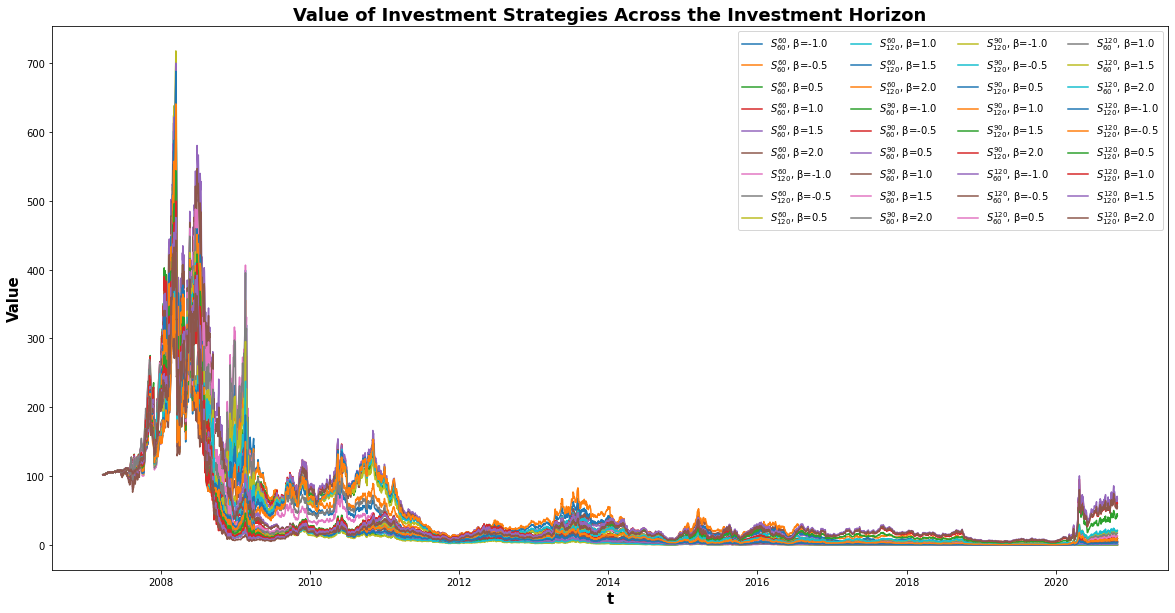